In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = Path('/content/gdrive/My Drive/Deep/Stone/')

In [ ]:
train_fnames = get_image_files(path/"Train")

In [ ]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_fnames)


In [ ]:
train_df = len(train_fnames)
print(f"There are {train_df} images")

There are 1453 images


In [ ]:
# print number of classes, length of train and valid dataset
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 1163, 290)

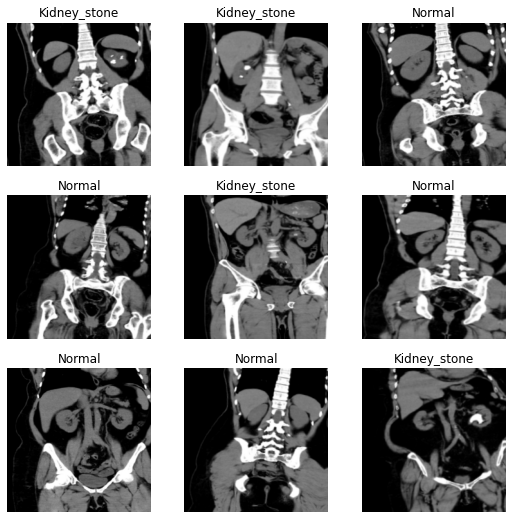

In [ ]:
dls.show_batch()

In [ ]:
model = nn.Sequential(create_body(xresnet50, pretrained=False),create_head(nf=2048, n_out=2))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)



In [ ]:
learn.fit_one_cycle(40,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.815017,1.368780,0.403448,06:07
1,0.764600,0.830080,0.486207,00:40
2,0.734295,0.663450,0.617241,00:40
3,0.704050,0.714246,0.513793,00:39
4,0.674893,4.563618,0.403448,00:40
5,0.635104,3.541168,0.403448,00:40
6,0.591084,7.456542,0.403448,00:40
7,0.552908,2.091071,0.565517,00:40
8,0.520331,25.976387,0.403448,00:40
9,0.480541,0.387135,0.813793,00:40


In [ ]:
learn.save(path/'kidney-50')

Path('/content/gdrive/My Drive/Deep/Stone/kidney-50.pth')

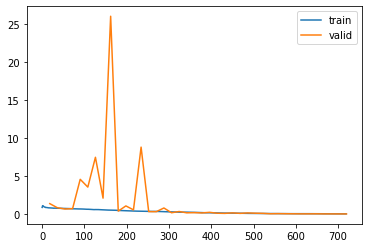

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
test_items = get_image_files(path/"Test")
all_files= get_image_files(path)

Evaluating model performance using the unseen Testset

In [ ]:

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)



In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 346


In [ ]:
learn1 = learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/My Drive/Deep/Stone/kidney-50')

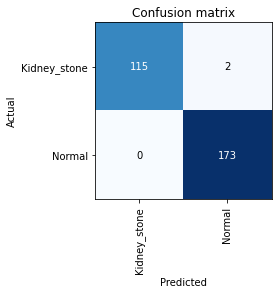

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()


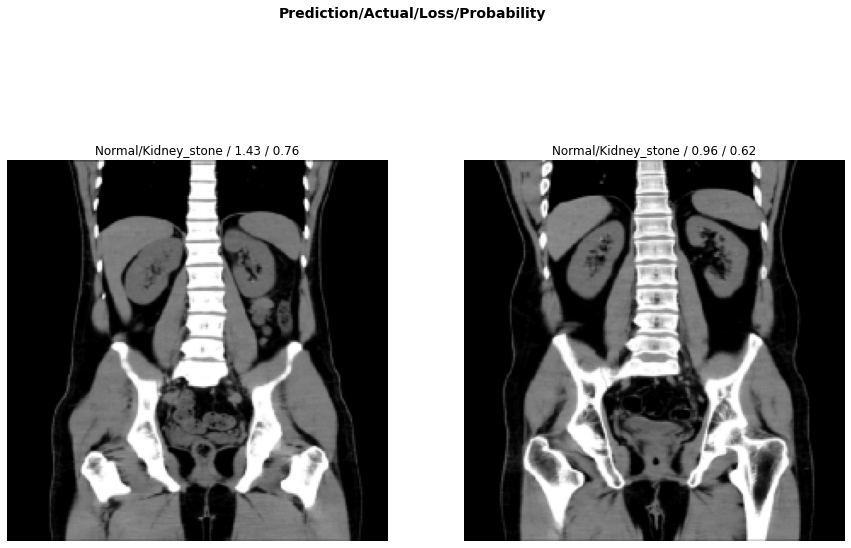

In [ ]:
interp.plot_top_losses(2, figsize=(15,10))

In [ ]:
learn1.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 112 x 112 
Conv2d                                    864        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 112 x 112 
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               